In [12]:
import numpy as np

In [23]:
# Define the target function
def target_func(x):
    return x**2

# Define the hypothesis space
def hypothesis(x, a, b):
    return a*x + b

# Define the squared error loss function
def squared_error(y_true, y_pred):
    return (y_true - y_pred)**2

# Define the number of experiments to run
num_experiments = 1000

# Define the number of data points to generate
num_data_points = 2

# Define the range of x values
x_range = np.linspace(-1, 1, 1000)

# Initialize the arrays to store the results
gbars = np.zeros(len(x_range))
biases = []
vars = []
eouts = []

# Run the experiments
# for i in range(num_experiments):
    # Generate the data points
    # data_points = np.random.uniform(-1, 1, size=(num_data_points,))

for x in range(num_experiments):
    target_value = target_func(x)

    # Fit the line to the data points
    # a, b = np.polyfit(data_points, target_values, 1)
    x1,x2 = np.random.uniform(-1, 1, 2)
    a = x1 + x2
    b = -x1 * x2
    
    # Calculate the gbar for each x value
    gbar = hypothesis(x, a, b)
    gbars += gbar
    
    test_predictions = hypothesis(x, a, b)
    
    # Calculate the bias and variance of the fitted line
    bias = (target_value - np.mean(hypothesis(x, a, b)))**2
    biases.append( bias)
    var = np.mean(np.square(test_predictions - np.mean(test_predictions)))
    vars.append( var)
    eout = np.mean((target_func(x) - hypothesis(x, a, b))**2)
    eouts.append( eout)

# Calculate the average gbar
gbars /= num_experiments

# Calculate the overall bias and variance
bias = np.mean(biases)
var = np.mean(vars)
eout = np.mean(eouts)

# Print the results
print("Bias: ", bias)
print("Variance: ", var)
print("Eout: ", eout)
print("Eout: var + bias", var + bias)

Bias:  199518097024.10852
Variance:  0.0
Eout:  199518097024.10852
Eout: var + bias 199518097024.10852


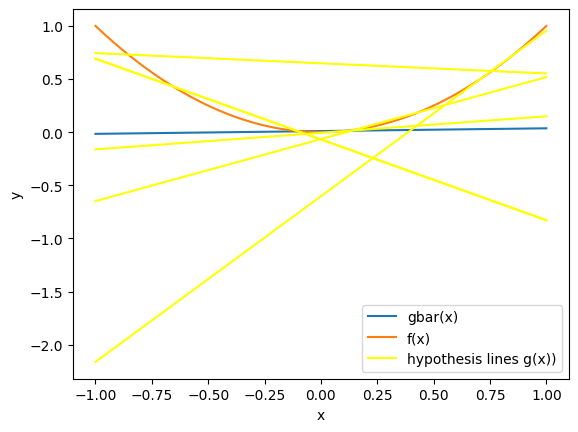

In [14]:
import matplotlib.pyplot as plt

# Plot gbar
plt.plot(x_range, gbars, label='gbar(x)')

# Plot target function
plt.plot(x_range, target_func(x_range), label='f(x)')

# Plot some hypothesis lines  
for i in range(5):
    data_points = np.random.uniform(-1, 1, size=(num_data_points,))
    target_values = target_func(data_points)
    a, b = np.polyfit(data_points, target_values, 1)
    plt.plot(x_range, hypothesis(x_range, a, b), color='yellow')
    # put concatenate label for all hypothesis lines as one label
    if i == 0:
        plt.plot(x_range, hypothesis(x_range, a, b), color='yellow', label='hypothesis lines g(x))')

# Add legend and axis labels
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

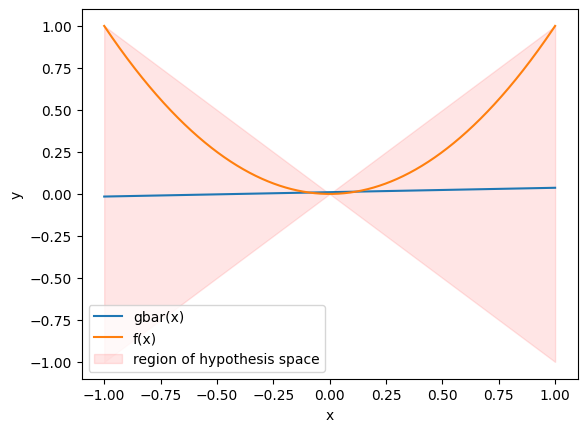

In [15]:
import matplotlib.pyplot as plt

# Plot gbar
plt.plot(x_range, gbars, label='gbar(x)')

# Plot target function
plt.plot(x_range, target_func(x_range), label='f(x)')

# fill the area between the upper and lower bounds
plt.fill_between(x_range, hypothesis(x_range, 1, 0), hypothesis(x_range, -1, 0),label="region of hypothesis space", color='red', alpha=0.1)

# Add legend and axis labels
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

n_points:  2
Bias:  0.12925575078067544
Variance:  7.703719777548943e-34
Eout:  0.20813467463809265
Bias+Variance:  0.12925575078067544
--------------------------


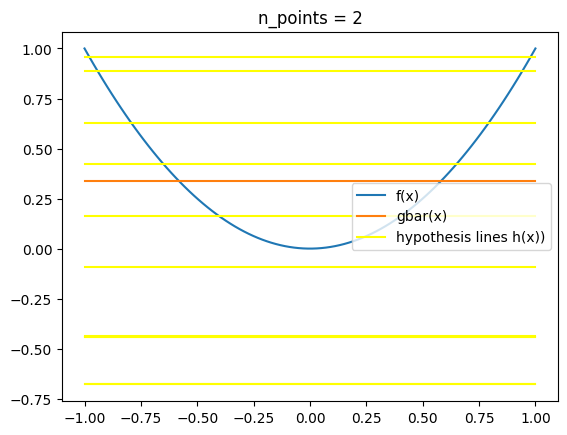

n_points:  5
Bias:  0.4000223390621449
Variance:  0.0
Eout:  0.20813467463809265
Bias+Variance:  0.4000223390621449
--------------------------


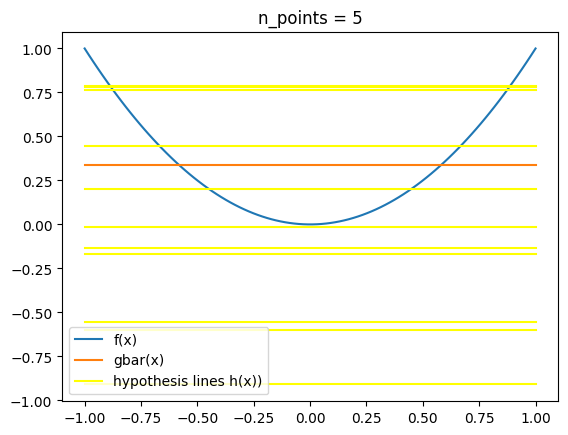

n_points:  10
Bias:  0.21390644022116803
Variance:  0.0
Eout:  0.20813467463809265
Bias+Variance:  0.21390644022116803
--------------------------


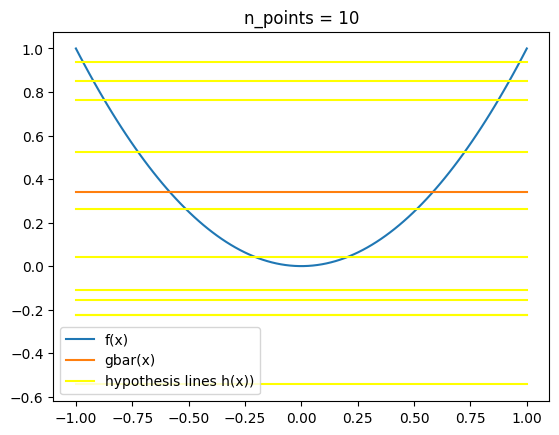

n_points:  20
Bias:  0.20062876698760668
Variance:  3.009265538105056e-36
Eout:  0.20813467463809265
Bias+Variance:  0.20062876698760668
--------------------------


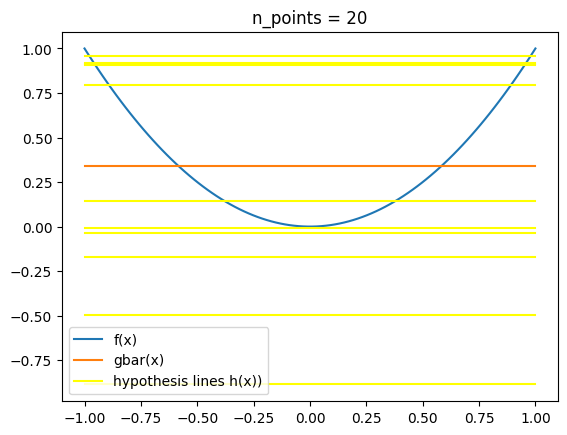

In [16]:
def gdFunc_quadratic(n_points):
    c = 0
    for _ in range(n_points):
        x = np.random.uniform(-1, 1)
        c += x**2
    return c/n_points

def gAverage_quadratic(samples_numb, n_points):
    gdFuncs = []
    for i in range(samples_numb):
        gdFuncs.append(gdFunc_quadratic(n_points))
    return gdFuncs

def target_func(x):
    return x**2

def const_hypothesis(x, c):
    return np.full_like(x, c)

def squared_error(y_true, y_pred):
    return (y_true - y_pred)**2

def calc_Eout(h_func, x, target_func):
    c = np.mean(x)
    return np.mean(squared_error(h_func(x, c), target_func(x)))

def run_numerical_experiment(n_points):
    # Generate the training data
    x_train = np.random.uniform(-1, 1, size=(n_points,))
    y_train = target_func(x_train)

    # Calculate the average input value
    c = np.mean(x_train)

    # Calculate the constant hypothesis and its test error
    h_values = const_hypothesis(x_train, c)
    h_test_values = const_hypothesis(x, c)
    h_test_error = np.mean(squared_error(target_func(x), h_test_values))

    # Calculate the gbar and its test error
    gbar_values = np.full_like(x, np.mean(y_train))
    gbar_test_error = np.mean(squared_error(target_func(x), gbar_values))

    # Calculate the bias and variance of the constant hypothesis
    bias = np.mean((target_func(x) - np.mean(h_test_values))**2)
    var = np.mean(np.square(h_test_values - np.mean(h_test_values)))

    # Calculate the Eout of the learned hypothesis
    eout = calc_Eout(const_hypothesis, x, target_func)

    return eout, bias, var

n_points_list = [2, 5, 10, 20]
x = np.linspace(-1, 1, 100)

for n_points in n_points_list:
    print("n_points: ", n_points)
    eout, bias, var = run_numerical_experiment(n_points)
    print("Bias: ", bias)
    print("Variance: ", var)
    print("Eout: ", eout)
    print("Bias+Variance: ", bias+var)
    print("--------------------------")

    # Plot the gbar(x), f(x) functions
    plt.plot(x, target_func(x), label='f(x)')
    plt.plot(x, np.full_like(x, np.mean(target_func(x))), label='gbar(x)')

    # plot some different hypothesis lines
    for i in range(10):
        plt.plot(x, const_hypothesis(x, np.random.uniform(-1, 1)), color='yellow')

    # put concatenate label for all hypothesis lines as one label
    plt.plot(x, const_hypothesis(x, np.random.uniform(-1, 1)), color='yellow', label='hypothesis lines h(x))')

        
    plt.legend()
    plt.title(f'n_points = {n_points}')
    plt.show()